In [68]:

# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'calendar' and 'datetime' module
import calendar
import datetime as dt


In [69]:
data = pd.read_csv('Unemployment in India.csv')

In [70]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [71]:

#Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   736 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                739 non-null    object 
 3   Estimated Unemployment Rate (%)          738 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


<Axes: >

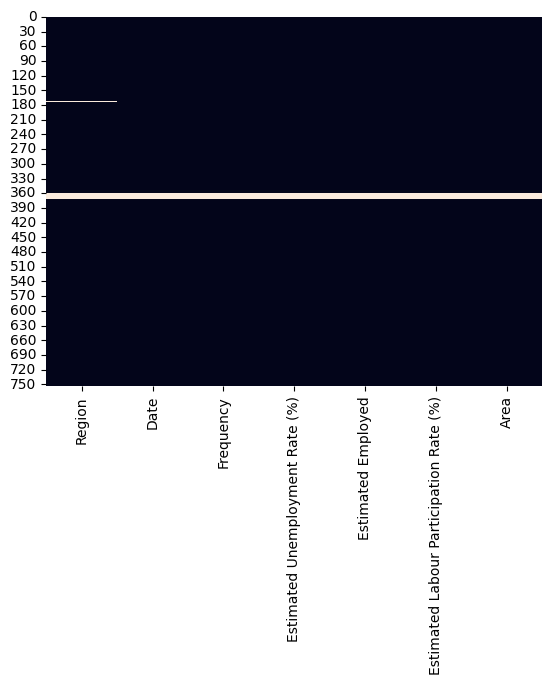

In [72]:

# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

In [73]:

# We don't need the 1st column so let's drop that
new_data=data.iloc[:,1:]


In [74]:
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']


In [75]:
# Convert the 'Frequency' column to a categorical data type
data['Frequency'] = data['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
data['Region'] = data['Region'].astype('category')

In [76]:

# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
data['Month'] = data['Date'].dt.month

In [77]:
data

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0
...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2.0
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3.0
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4.0
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5.0


In [78]:
# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
data['Month_int'] = data['Month'].apply(lambda x: int(x) if pd.notna(x) else x)
     

In [79]:

# Drop the 'Month' column from the DataFrame
data.drop(columns='Month', inplace=True)

In [80]:

# Drop all the missing values from 'df' dataset
data=data.dropna()

In [81]:

# Lets create a copy of the dataset for the data of during lockdown period
data_ld = data.copy()
     

In [82]:
data = data[(data['Date'] >= '2019-05-31') & (data['Date'] <= '2020-03-31')]

In [83]:
data

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0
...,...,...,...,...,...,...,...,...
746,West Bengal,2019-11-30,Monthly,6.61,10768462.0,43.44,Urban,11.0
747,West Bengal,2019-12-31,Monthly,7.24,11335696.0,45.97,Urban,12.0
748,West Bengal,2020-01-31,Monthly,7.27,11208617.0,45.39,Urban,1.0
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2.0


In [84]:
data_ld  = data_ld [ (data_ld['Date'] >= '2020-04-30')]

In [85]:
data_ld

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_int
11,Andhra Pradesh,2020-04-30,Monthly,16.29,8792827.0,36.03,Rural,4.0
12,Andhra Pradesh,2020-05-31,Monthly,14.46,9526902.0,38.16,Rural,5.0
13,Andhra Pradesh,2020-06-30,Monthly,0.85,15572975.0,53.76,Rural,6.0
24,Assam,2020-05-31,Monthly,9.38,9926176.0,50.00,Rural,5.0
25,Assam,2020-06-30,Monthly,0.00,7544937.0,34.38,Rural,6.0
...,...,...,...,...,...,...,...,...
738,Uttarakhand,2020-05-31,Monthly,17.36,778590.0,32.27,Urban,5.0
739,Uttarakhand,2020-06-30,Monthly,5.08,989470.0,35.61,Urban,6.0
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4.0
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5.0


Text(0.5, 1.0, 'Estimated Unemployment Rate Before Lockdown')

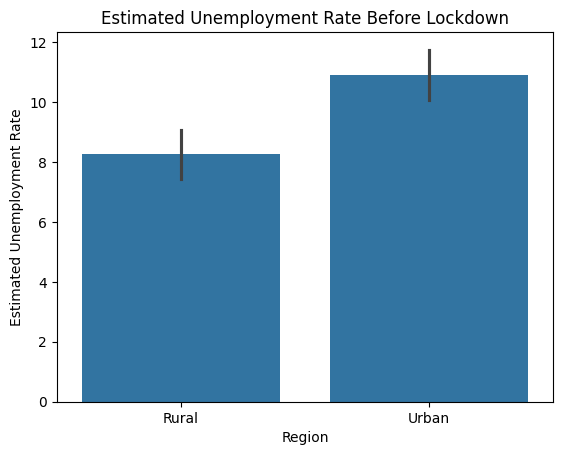

In [86]:
# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=data)

# Set labels and title for the first subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

Text(0.5, 1.0, 'Estimated Unemployment Rate During Lockdown')

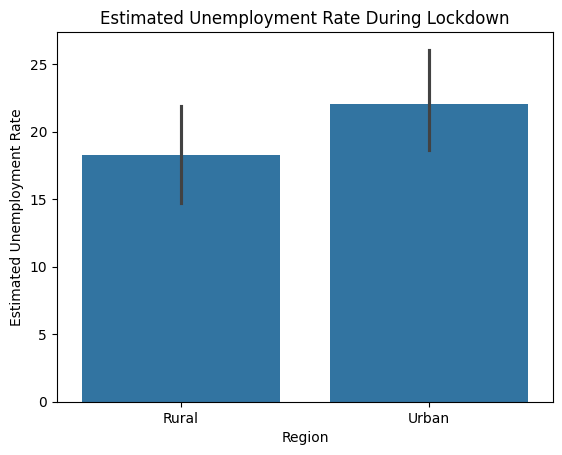

In [87]:
# Create a bar plot for the Estimated Unemployment Rate during lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=data_ld)

# Set labels and title for the second subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

Text(0, 0.5, 'Estimated Unemployment Rate')

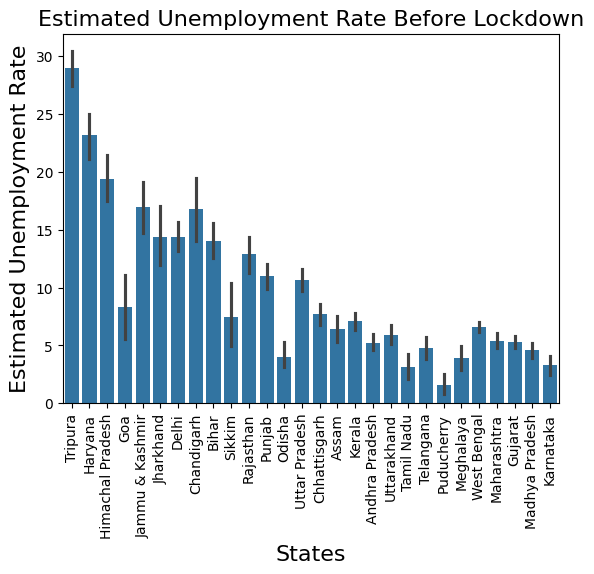

In [88]:
# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=data.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)


Text(0, 0.5, 'Estimated Unemployment Rate')

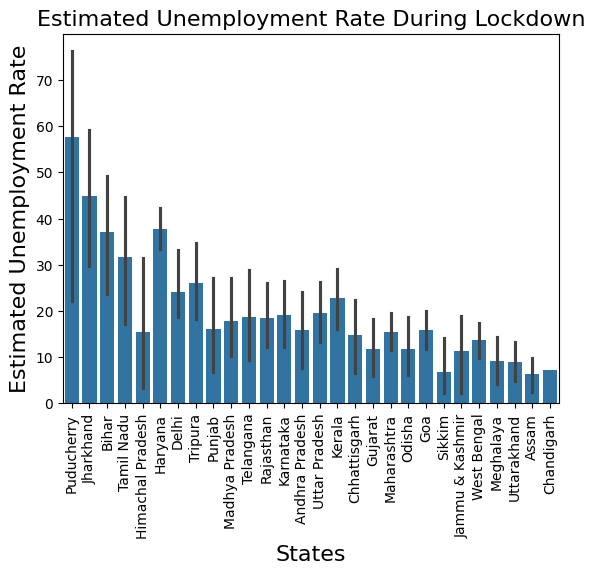

In [89]:
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=data_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)